In [1]:
import os
from os.path import isfile, join

import re

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
path = '../data/graphs/kw38/result_all_lm'

def build_df_from_csvs(path: str) -> pd.DataFrame:
    files = os.listdir(path)
    df = pd.DataFrame()

    for current_file in files:
    # current_file = files[0]
        df_tmp = pd.read_csv(join(path, current_file), delimiter=',\t')
        
        prefix = [re.findall(r'(\w+?)(\d+\.\d+|\d+)', identifier)[0] for identifier in current_file.split('-')[0].split('_')]
        for cn, cv in prefix:
            df_tmp[cn] = pd.to_numeric(cv)

        suffix = current_file.split('-')[2].split('_')
        if len(suffix) == 3:
            suffix[1] = '{}_{}'.format(suffix[1], suffix[2])
            suffix.pop(2)
        suffix[1] = suffix[1].split('.')[0]
        df_tmp['Sampling'] = suffix[0]
        # TODO: Fix name, die to annotations
        df_tmp['Clustering'] = suffix[1].split('_')[-1]
        
        df = pd.concat([df, df_tmp])

    # postprocess
    df['jsd'] = df['jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'jsd':'ijsd'}, inplace = True)

    df['bootstrap_jsd'] = df['bootstrap_jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'bootstrap_jsd':'inverse_bootstrap_jsd'}, inplace = True)

    return df

df = build_df_from_csvs(path)
df.head()

,Checkpoint,inverse_bootstrap_jsd,gambette,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering
0,10,0.975686,0.997603,4,0.656773,-0.069590,100,10,0.3,pagerank,lm
1,20,0.962287,0.988704,5,0.618862,0.042182,100,10,0.3,pagerank,lm
2,30,0.966973,0.978409,6,0.621476,0.031604,100,10,0.3,pagerank,lm
3,40,0.961263,0.971744,7,0.587656,0.001602,100,10,0.3,pagerank,lm
4,50,0.943474,0.943366,7,0.582776,0.022510,100,10,0.3,pagerank,lm


In [3]:
sns.set_theme(style="darkgrid")

checkpoints = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000,  3000, 4000, 5000]

In [17]:
df_overview = pd.melt(df, id_vars=['Checkpoint', 'k', 'log'], value_vars=['cluster_number'], var_name='Measure', value_name='Cluster Size')

df_overview.head()

,Checkpoint,k,log,Measure,Cluster Size
0,10,10,0.3,cluster_number,4
1,20,10,0.3,cluster_number,5
2,30,10,0.3,cluster_number,6
3,40,10,0.3,cluster_number,7
4,50,10,0.3,cluster_number,7


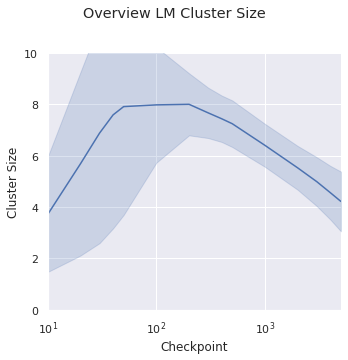

In [21]:
rp = sns.relplot(data=df_overview,
    x='Checkpoint', y='Cluster Size', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Overview LM Cluster Size')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0, 10])

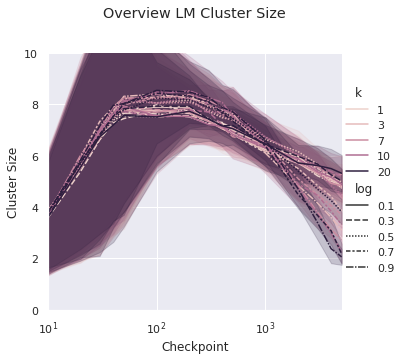

In [22]:
rp = sns.relplot(data=df_overview,
    x='Checkpoint', y='Cluster Size', ci='sd', kind='line', hue="k", style="log")

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Overview LM Cluster Size')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0, 10])